# [TEMPLATE] DATASET DEPURADO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [3]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [4]:
# Colores a utilizar

amarillo = '#FCAA67'
rojo = '#B0413E'
verde = '#FFFFC7'
azul = '#548687'
marron = '#473335'

<hr>

# Distribucion del precio del metro cuadrado

In [5]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [6]:
#Nos quedamos con las columnas que nos interesan.
df = df[['fecha', 'tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'metroscubiertos', 'metrostotales', 'precio']]

In [7]:
# Para calcular el precio por metro cuadrado necesitamos que los datos de metros totales sean coherente
# y no sean nulos:

In [8]:
(df['metrostotales'] != -1).value_counts()

True     188533
False     51467
Name: metrostotales, dtype: int64

In [9]:
(df['metroscubiertos'] != -1).value_counts()

True     222600
False     17400
Name: metroscubiertos, dtype: int64

In [10]:
# Vemos que tenemos un gran indice de valores nulos en cuanto a metros totales, esto puede deberse a que
# muchas publicaciones tienen la cantidad de metros totales en donde deberian ir los cubiertos.

In [11]:
df = df.loc[(df['metroscubiertos'] != -1) & (df['metrostotales'] != -1)]

In [12]:
df.loc[(df['metroscubiertos'] > df['metrostotales'])]

,fecha,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,metroscubiertos,metrostotales,precio
1,2013-06-28,Casa en condominio,La Magdalena Contreras,Distrito Federal,10,3,268,180,3600000
12,2013-08-12,Casa,Querétaro,Querétaro,0,3,170,141,1500000
13,2015-03-31,Casa,Benito Juárez,Distrito Federal,20,-1,227,185,3000000
14,2014-11-25,Casa,Zapopan,Jalisco,-1,-1,250,231,5300000
21,2016-02-01,Casa en condominio,Querétaro,Querétaro,-1,3,181,150,2300000
...,...,...,...,...,...,...,...,...,...
239979,2016-03-04,Casa,Miguel Hidalgo,Distrito Federal,10,3,198,122,3300000
239983,2016-02-09,Casa,San Luis Potosí,San luis Potosí,-1,3,119,59,684338
239985,2016-12-07,Casa en condominio,Atizapán de Zaragoza,Edo. de México,10,3,145,87,2700000
239994,2013-07-31,Casa,Zapopan,Jalisco,3,2,160,90,1350000


In [13]:
# Como vemos, tenemos muchisimos datos en lo que los metros cubiertos son mayores a los totales, cosa que 
# no tiene ningun sentido. Lamentablemente, para no tomar ninguna hipotesis erronea, deberemos eliminarlos y
# trabajar con los datos cargados correctamente.

In [14]:
df = df.loc[(df['metroscubiertos'] <=df['metrostotales'])]

In [15]:
df.shape

(100838, 9)

In [16]:
mt = 'precio metro cuadrado'
mtp = 'precio promedio metro cuadrado'
df[mt] = (df['precio'])/(df['metrostotales'])

In [17]:
df

,fecha,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,metroscubiertos,metrostotales,precio,precio metro cuadrado
0,2015-08-23,Apartamento,Benito Juárez,Distrito Federal,-1,2,80,80,2273000,28412.500000
2,2015-10-17,Casa,Tonalá,Jalisco,5,3,144,166,1200000,7228.915663
3,2012-03-09,Casa,Zinacantepec,Edo. de México,1,2,63,67,650000,9701.492537
4,2016-06-07,Apartamento,Zapopan,Jalisco,10,2,95,95,1150000,12105.263158
5,2014-03-18,Apartamento,Coyoacán,Distrito Federal,5,2,75,90,1100000,12222.222222
...,...,...,...,...,...,...,...,...,...,...
239991,2015-03-14,Apartamento,Iztacalco,Distrito Federal,20,2,68,68,1450000,21323.529412
239992,2015-11-23,Casa en condominio,Huixquilucan,Edo. de México,10,3,270,293,5500000,18771.331058
239993,2015-03-22,Casa,Zapopan,Jalisco,1,3,150,150,1650000,11000.000000
239996,2014-07-10,Casa,Toluca,Edo. de México,0,3,200,250,1940000,7760.000000


In [18]:
#Ahora ya podemos calcular algunos parametros de interes:

# Precio promedio del metro cuadrado en Mexico

In [19]:
prom = df[mt].mean()

In [20]:
print(prom)

12990.601495203458


Ahora podemos comparar con esta referencia.

# Precio promedio del metro cuadrado segun provincia:

In [21]:
p1 = df.copy()
p1 = p1.groupby('provincia')[mt].agg(['mean']).reset_index().rename(columns={'mean':mtp}).sort_values(mtp, ascending=True)

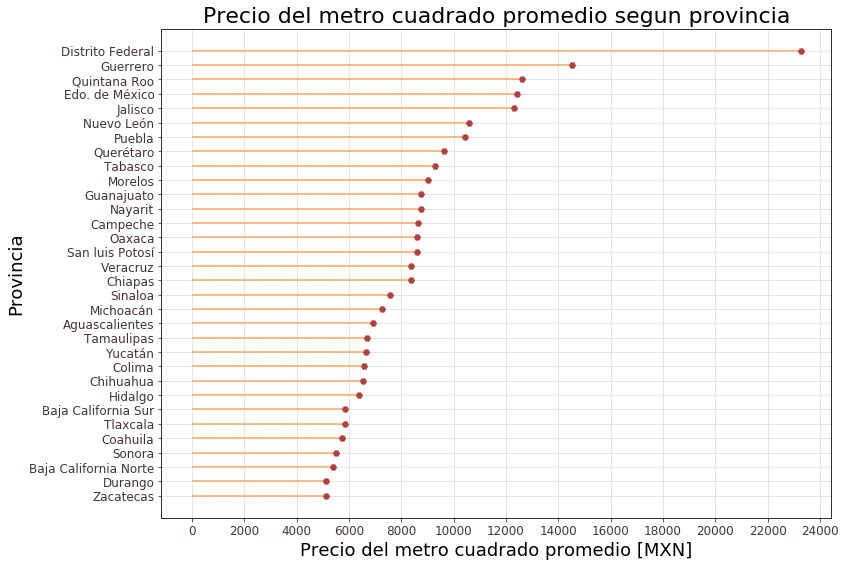

In [22]:
my_range=range(1,len(p1.index)+1)

plt.rc('axes', axisbelow=True)

plt.figure(figsize=(12,9))

plt.hlines(y=my_range, xmin=0, xmax=p1[mtp], color=amarillo)
plt.plot(p1[mtp], my_range, "H", color=rojo)
plt.yticks(my_range, p1['provincia'])
plt.xticks(np.arange(0, 26000, step=2000))
plt.xlabel("Precio del metro cuadrado promedio [MXN]", fontsize=18)
plt.ylabel("Provincia", fontsize=18)
plt.title("Precio del metro cuadrado promedio segun provincia", fontsize=22)
plt.grid(True)
plt.tick_params(colors=marron, grid_alpha=0.4, labelsize=12)

plt.savefig("precio mt cuadrado por provincia.png", transparent=True, bbox_inches='tight')


##### Diferencia respecto del precio promedio

In [23]:
p1['diferencia precio prom'] = p1[mtp] - prom

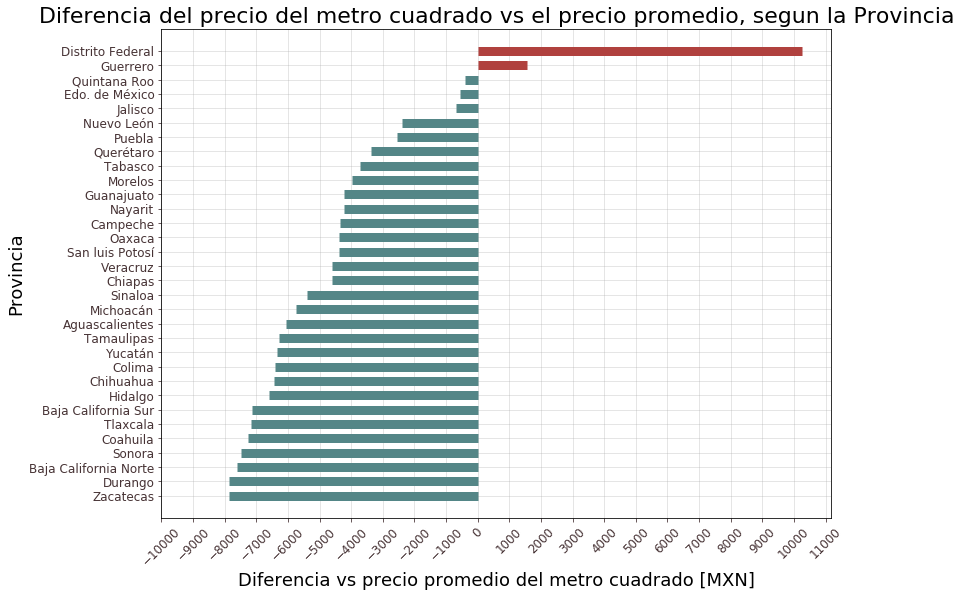

In [44]:
values = p1['diferencia precio prom']
provincias = p1['provincia']
my_color=np.where(values > 0, rojo, azul)

plt.rc('axes', axisbelow=True)
plt.figure(figsize=(12,9))

plt.hlines(y=provincias, xmin=0, xmax=values, color=my_color, linewidth=9)

plt.xlabel("Diferencia vs precio promedio del metro cuadrado [MXN]", fontsize=18)
plt.ylabel("Provincia", fontsize=18)
plt.title("Diferencia del precio del metro cuadrado vs el precio promedio, segun la Provincia", fontsize=22)
plt.grid(True)
plt.xticks(np.arange(-10000, 12000, step=1000), rotation=45)
plt.tick_params(colors=marron, grid_alpha=0.4, labelsize=12)

plt.savefig("diferencia precio vs prom por provincia.png", transparent=True, bbox_inches='tight')
